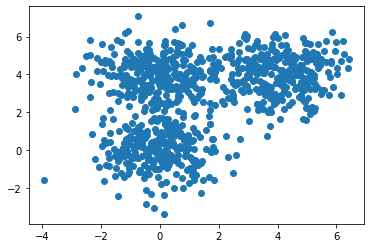

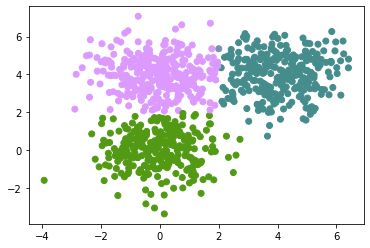

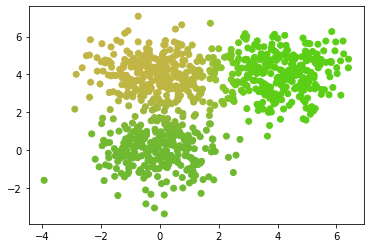

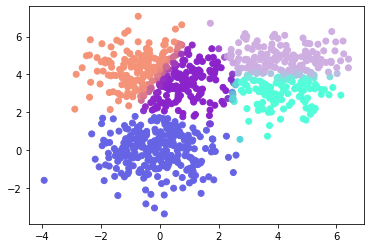

In [38]:
import numpy as np
import matplotlib.pyplot as plt


def multiplication(u, v):
    diff = u - v
    return diff.dot(diff)


def cost(X, R, M):
    cost = 0
    for k in range(len(M)):
        for n in range(len(X)):
            cost += R[n,k]*multiplication(M[k], X[n])
    return cost


def generate_dataset():
    # s - сепаратор, расстояние между пучками
    s = 4 
    # количество точек
    N = 900
    
    target1 = np.array([0, 0])
    target2 = np.array([s, s])
    target3 = np.array([0, s])
    
    a = np.zeros((N, 2))
    a[:300, :] = np.random.randn(300, 2) + target1
    a[300:600, :] = np.random.randn(300, 2) + target2
    a[600:, :] = np.random.randn(300, 2) + target3

    return a


def algorithm(X, K, max_iter=20, beta=3.0, show_plots=False):
    N, D = X.shape
    exponents = np.empty((N, K))
    initial_centers = np.random.choice(N, K, replace=False)
    M = X[initial_centers]
    costs = []
    k = 0
    for i in range(max_iter):
        k += 1
        for k in range(K):
            for n in range(N):
                exponents[n,k] = np.exp(-beta*multiplication(M[k], X[n]))
        R = exponents / exponents.sum(axis=1, keepdims=True)
        M = R.T.dot(X) / R.sum(axis=0, keepdims=True).T
        c = cost(X, R, M)
        costs.append(c)


    random_colors = np.random.random((K, 3))
    colors = R.dot(random_colors)
    plt.scatter(X[:,0], X[:,1], c=colors)
    plt.show()

    

def main():
    a = generate_dataset()
    plt.scatter(a[:,0], a[:,1])
    plt.show()
    algorithm(a, K=3, beta=10.0)
    algorithm(a, K=3, beta=0.3)
    algorithm(a, K=5)

if __name__ == '__main__':
    main()